# Alexandra Green

## Research question/interests

I am researching *which MLS playoff winning team has the worst goal differential* and *how their shots and shots on goal compare to the team with the best goal differential*.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import project_functions1 as pf1

### Player Data for Shots and Shots on Goal

In [31]:
pShots = pd.read_csv('../data/raw/all_players.csv')

### Team Data for Goal Differential and Yearly Standings

In [32]:
gDifferential = pd.read_csv('../data/raw/all_tables.csv')

# Exploratory Data Analysis
### Describe the Dataset
This dataset was found on Kaggle and was provided by Joseph Kohr. The dataset includes all statistics relevant to the games, year, and players, including goals against, goals for, each season's league champion, shots and shots on goal. This is just the data that I will be working with in my analysis, but the data also includes all important data about each team, player and season beginning in 1996 until now. Joseph Kohr scrapped data from the Major League Soccer website for player data and fbref, a statistics site dedicated to both women's and men's soccer competitions. Data was also taken from espn and wikipedia and his objective for scrapping the data was just for public interest. 
### Initial Thoughts
There is a lot of data in these datasets, most of the columns will not be of any use to me. I will have to drop those columns and I may have to drop years where they played less games than they do now. This way all the data I will be working with will all be consistent. I will be looking to gain insight on each team's shots and shots on goals for each season, which mean I will have to add each player's shots and shots on goal from a team's roster that season. In addition, having the goal differential data makes it a lot easier when looking at the first table. 

### All_Tables Data

In [33]:
print(f"The columns and rows in this table: {gDifferential.shape}")
print(F"Names of the columns in this table: {gDifferential.columns}")
gDifferential.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))).T

The columns and rows in this table: (788, 17)
Names of the columns in this table: Index(['Pos', 'Team', 'GP', 'W', 'L', 'SW', 'GF', 'GA', 'GD', 'Pts',
       'Qualification', 'Conference', 'Year', 'SL', 'D', 'Head-to-head',
       'PPG'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
Pos,744.000000,7.420699,5.407154,1.000000,3.000000,6.000000,10.000000,27.000000
GP,788.000000,30.050761,6.915167,6.000000,30.000000,32.000000,34.000000,34.000000
W,788.000000,11.402284,4.202540,1.000000,9.000000,12.000000,14.000000,24.000000
L,788.000000,11.572335,4.553909,0.000000,9.000000,12.000000,14.250000,25.000000
SW,64.000000,3.500000,1.825742,0.000000,2.000000,3.000000,5.000000,10.000000
...,...,...,...,...,...,...,...,...
GA,788.000000,42.838832,13.578448,3.000000,37.000000,44.000000,51.000000,75.000000
Year,788.000000,2011.454315,7.159053,1996.000000,2006.000000,2013.000000,2018.000000,2021.000000
SL,24.000000,3.958333,1.706233,0.000000,3.000000,4.000000,5.000000,7.000000
D,724.000000,7.516575,3.243208,0.000000,6.000000,8.000000,9.000000,18.000000


In [34]:
gDifferential.nunique(axis=0)

Pos             27
Team            96
GP              13
W               24
L               25
                ..
Year            26
SL               7
D               18
Head-to-head     2
PPG             19
Length: 17, dtype: int64

In [35]:
gDifferential.describe(include='object').T

,count,unique,top,freq
Team,788,96,New England Revolution,44
GD,788,93,4,38
Pts,788,69,39,42
Qualification,292,86,Playoffs,32
Conference,788,7,Overall,371
Head-to-head,4,2,DAL: 7 ptsCOL: 4 pts,2


### All_players Data

In [36]:
print(f"The columns and rows of this table: {pShots.shape}")
print(f"The names of the columns in this table: {pShots.columns}")
pShots.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

The columns and rows of this table: (15767, 28)
The names of the columns in this table: Index(['Player', 'Club', 'POS', 'GP', 'GS', 'MINS', 'G', 'A', 'SHTS', 'SOG',
       'GWG', 'PKG/A', 'HmG', 'RdG', 'G/90min', 'SC%', 'GWA', 'HmA', 'RdA',
       'A/90min', 'FC', 'FS', 'OFF', 'YC', 'RC', 'SOG%', 'Year', 'Season'],
      dtype='object')


,GP,GS,MINS,G,A,SHTS,SOG,GWG,HmG,RdG,...,HmA,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year
count,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,...,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,15767.000000,10697.000000,15767.000000
mean,10.793049,8.494641,765.211327,1.195408,1.220587,10.867508,4.313757,0.313947,0.707871,0.487537,...,0.728991,0.491596,0.107684,11.217987,10.521913,2.166424,1.431598,0.099638,inf,2010.213991
std,10.878347,9.924136,871.890880,2.688262,2.336127,18.092364,7.956445,0.845024,1.702995,1.217168,...,1.511027,1.088750,0.436118,13.892676,14.786274,5.472077,2.063006,0.333209,nan,7.209422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,1.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2005.000000
50%,6.000000,4.000000,338.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,4.000000,0.000000,0.000000,0.000000,36.000000,2012.000000
75%,21.000000,16.000000,1414.500000,1.000000,1.000000,13.000000,5.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.140000,18.000000,15.000000,2.000000,2.000000,0.000000,50.000000,2016.000000
max,35.000000,34.000000,3060.000000,34.000000,26.000000,181.000000,76.000000,11.000000,22.000000,16.000000,...,16.000000,13.000000,30.000000,86.000000,112.000000,82.000000,14.000000,3.000000,inf,2020.000000


In [37]:
pShots.describe(include='object')

,Player,Club,POS,PKG/A,Season
count,15767,10274,15767,15767,15767
unique,3304,51,7,29,2
top,Kyle Beckerman,COL,M,0/0,reg
freq,37,685,5984,14809,10274


In [38]:
pShots.nunique(axis=0)

Player    3304
Club        51
POS          7
GP          36
GS          35
          ... 
YC          15
RC           4
SOG%       727
Year        25
Season       2
Length: 28, dtype: int64

# Analysis Pipeline
## Load Data

In [39]:
pShots = pd.read_csv('../data/raw/all_players.csv')
gDifferential = pd.read_csv('../data/raw/all_tables.csv')

## Clean Data

### All_tables

In [40]:
#Dropped columns with more than 40% null values, because it made the dataset very large.
threshold = len(gDifferential) *.40
season_games_min = 30
gDiff_cleaned = gDifferential.copy()
gDiff_cleaned = gDiff_cleaned.dropna(thresh=threshold, axis=1)
#check for duplicates
if len(gDiff_cleaned[gDiff_cleaned.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(gDiff_cleaned[gDiff_cleaned.duplicated()]))
    print(gDiff_cleaned[gDiff_cleaned.duplicated(keep=False)].sort_values(by=list(gDiff_cleaned.columns)).head())
else:
    print("No duplicated entries found")
#Drop D row
gDiff_cleaned = gDiff_cleaned.drop(['D'], axis=1)

No duplicated entries found


### All_players

In [41]:
pShots_cleaned = pShots.copy()
#check for duplicates
if len(pShots_cleaned[pShots_cleaned.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(pShots_cleaned[pShots_cleaned.duplicated()]))
    print(pShots_cleaned[pShots_cleaned.duplicated(keep=False)].sort_values(by=list(pShots_cleaned.columns)).head())
else:
    print("No duplicated entries found")
pShots_cleaned.drop_duplicates(inplace=True)

No. of duplicated entries:  337
         Player Club POS  GP  GS  MINS  G  A  SHTS  SOG  ...  RdA A/90min  FC  \
32    A.J. Wood  MET   F  21  13  1136  5  2    34   22  ...    0    0.16  17   
250   A.J. Wood  MET   F  21  13  1136  5  2    34   22  ...    0    0.16  17   
9671  A.J. Wood  NaN   F   2   2    96  0  0     1    1  ...    0    0.00   1   
9790  A.J. Wood  NaN   F   2   2    96  0  0     1    1  ...    0    0.00   1   
153   Adam Frye  TB    D  15   9   725  0  1     6    4  ...    0    0.12  14   

      FS  OFF  YC  RC    SOG%  Year  Season  
32    25    4   0   0   64.71  1996     reg  
250   25    4   0   0   64.71  1996     reg  
9671   2    0   0   0  100.00  1996    post  
9790   2    0   0   0  100.00  1996    post  
153    6    3   3   1   66.67  1996     reg  

[5 rows x 28 columns]


## Process Data

### All_tables

In [42]:
#Drop any seasons with less than 30 games
gDiff_cleaned = gDiff_cleaned[gDiff_cleaned['GP'] >= season_games_min]
#Drop any statistics for regular season conference play to gain insight on overall statistics
gDiff_cleaned = gDiff_cleaned[gDiff_cleaned['Conference'] == 'Overall']
#Sort values by overall ranking and highest goal differential
gDiff_cleaned.sort_values(by = ['Pos', 'GD'], ascending = [True, False])
gDiff_cleaned.Year.unique()

array([1996, 1997, 2000, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

### All_players

In [43]:
#making sure the years match with all_tables
years = [2000, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019]
pShots_cleaned = pShots_cleaned[['Player', 'Club', 'G', 'SHTS', 'SOG', 'SOG%', 'Year']]
pShots_cleaned = pShots_cleaned[pShots_cleaned.Year.isin(years) == True]
pShots_cleaned.sort_values(by = ['Player','Year'], ascending = [True, True])
pShots_cleaned = pShots_cleaned.replace(['ATL','VAN','CHI','CIN','CHV','CLB','TB ','DAL','COL','HOU','POR','NYC', 'ORL', 'TOR', 'MTL', 'NSH', 'MIN', 'MIA', 'PHI', 'SEA', 'RSL'],['Atlanta United FC','Vancouver Whitecaps FC', 'Chicago Fire', 'FC Cincinnati','Chivas USA','Columbus Crew', 'Tampa Bay Mutiny', 'FC Dallas','Colorado Rapids','Houston Dynamo','Portland Timbers','New York City FC', 'Orlando City SC', 'Toronto FC', 'Montreal Impact', 'Nashville SC', 'Minnesota United FC', 'Inter Miami CF', 'Philadelphia Union', 'Seattle Sounders FC', 'Real Salt Lake'])
pShots_cleaned = pShots_cleaned.replace(['NY','NYC','NY '],'New York City FC')
pShots_cleaned = pShots_cleaned.replace(['NYR', 'RBNY', 'MET', 'MetroStars'],'New York Red Bulls')
pShots_cleaned = pShots_cleaned.replace(['DC', 'DC '],'D.C. United')
pShots_cleaned = pShots_cleaned.replace(['NE', 'NE '],'New England Revolution')
pShots_cleaned = pShots_cleaned.replace(['SKC', 'KC '],'Sporting Kansas City')
pShots_cleaned = pShots_cleaned.replace(['SJ', 'SJ '],'San Jose Earthquakes')
pShots_cleaned = pShots_cleaned.replace(['LA', 'LA '],'Los Angeles Galaxy')
pShots_cleaned = pShots_cleaned.replace(['LAFC', 'LFC'],'Los Angeles FC')
values = ['CAN','CIV','ECU','GHA','HAI','HON','JAM','MTQ','PAN','USA','ROC','SLV']
pShots_cleaned= pShots_cleaned[pShots_cleaned.Club.isin(values) == False]
pShots_cleaned.rename(columns = {'Club':'Team'}, inplace = True)

## Wrangle Data

### All_players

In [44]:
df = pShots_cleaned.groupby(['Player','Year']).agg({'SHTS': 'sum', 'SOG': 'sum', 'Team':'sum'})
df = pShots_cleaned.groupby(['Team','Year']).agg({'SHTS': 'sum', 'SOG': 'sum'})

### All_tables

In [45]:
gDiff_cleaned.sort_values(by = ['Pos', 'GD'], ascending = [True, False])

,Pos,Team,GP,W,L,GF,GA,GD,Pts,Conference,Year
140,1.0,Columbus Crew,30,12,5,40,32,8,49[a],Overall,2004
658,1.0,Los Angeles FC,34,21,4,85,37,48,72,Overall,2019
566,1.0,Toronto FC,34,20,5,74,37,37,69,Overall,2017
369,1.0,San Jose Earthquakes,34,19,6,72,43,29,66,Overall,2012
611,1.0,New York Red Bulls,34,22,7,62,33,29,71,Overall,2018
...,...,...,...,...,...,...,...,...,...,...,...
632,22.0,Orlando City SC,34,8,22,43,74,−31,28,Overall,2018
587,22.0,LA Galaxy,34,8,18,45,67,−22,32,Overall,2017
633,23.0,San Jose Earthquakes,34,4,21,49,71,−22,21,Overall,2018
680,23.0,Vancouver Whitecaps FC,34,8,16,37,59,−22,34,Overall,2019


# Method Chaining

In [46]:
all_players = '../data/raw/all_players.csv'
all_tables = '../data/raw/all_tables.csv'
processed_at = pf1.load_and_process_goals(all_tables)

No duplicated entries found


In [47]:
processed_ap = pf1.load_and_process_players(all_players)
processed_ap
# I need to add the clubs goals like in the pipeline analysis

No. of duplicated entries:  337
         Player Club POS  GP  GS  MINS  G  A  SHTS  SOG  ...  RdA A/90min  FC  \
32    A.J. Wood  MET   F  21  13  1136  5  2    34   22  ...    0    0.16  17   
250   A.J. Wood  MET   F  21  13  1136  5  2    34   22  ...    0    0.16  17   
9671  A.J. Wood  NaN   F   2   2    96  0  0     1    1  ...    0    0.00   1   
9790  A.J. Wood  NaN   F   2   2    96  0  0     1    1  ...    0    0.00   1   
153   Adam Frye  TB    D  15   9   725  0  1     6    4  ...    0    0.12  14   

      FS  OFF  YC  RC    SOG%  Year  Season  
32    25    4   0   0   64.71  1996     reg  
250   25    4   0   0   64.71  1996     reg  
9671   2    0   0   0  100.00  1996    post  
9790   2    0   0   0  100.00  1996    post  
153    6    3   3   1   66.67  1996     reg  

[5 rows x 28 columns]


SHTS  SOG Club
Player                 Year                
 Christian Wilhelmsson 2012    11    2  LA 
A.J. DeLaGarza         2009     4    2  MIA
                       2010     1    1  MIA
                       2011     3    1  MIA
                       2012     1    0  MIA
...                           ...  ...  ...
Álvaro Fernández       2010     4    3  SEA
                       2011    45   21  SEA
                       2012    31    8  CHI
                       2016     5    2  SEA
                       2017     5    4  SEA

[7698 rows x 3 columns]

# Analysis

### All_tables analysis
1. The Team with the league championship and the greatest goal differential is Los Angeles with +48 in the 2019 season
2. The Team with the league championship and the worst goal differential is Columbus Crew with +8 in the 2004 season
(this team played 4 less games)
3. The Team with the league championship and the worst goal differential in a 34 game season is FC Dallas with +10 in the 2016 season


### All_players analysis
1. Los Angeles has 588 Shots and 220 Shots on goal in the 2019 season
2. Columbus Crew had 335 Shots and 147 Shots on goal in the 2004 season
3. FC Dallas had 230 Shots and 88 Shots on Goal in the 2016 season

<AxesSubplot:>

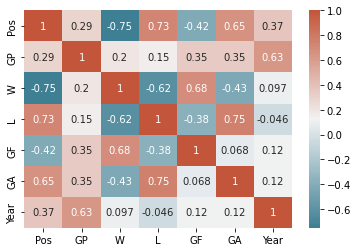

In [48]:
corr = gDiff_cleaned.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220,20,as_cmap=True))

In this heatmap, there is a highly positive correlation with goals for and wins, and similarly with goals against and losses.

<AxesSubplot:xlabel='GA', ylabel='L'>

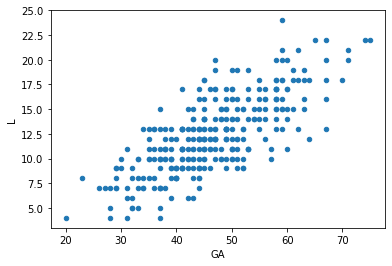

In [49]:
gDiff_cleaned.plot(kind='scatter', x='GA', y='L')

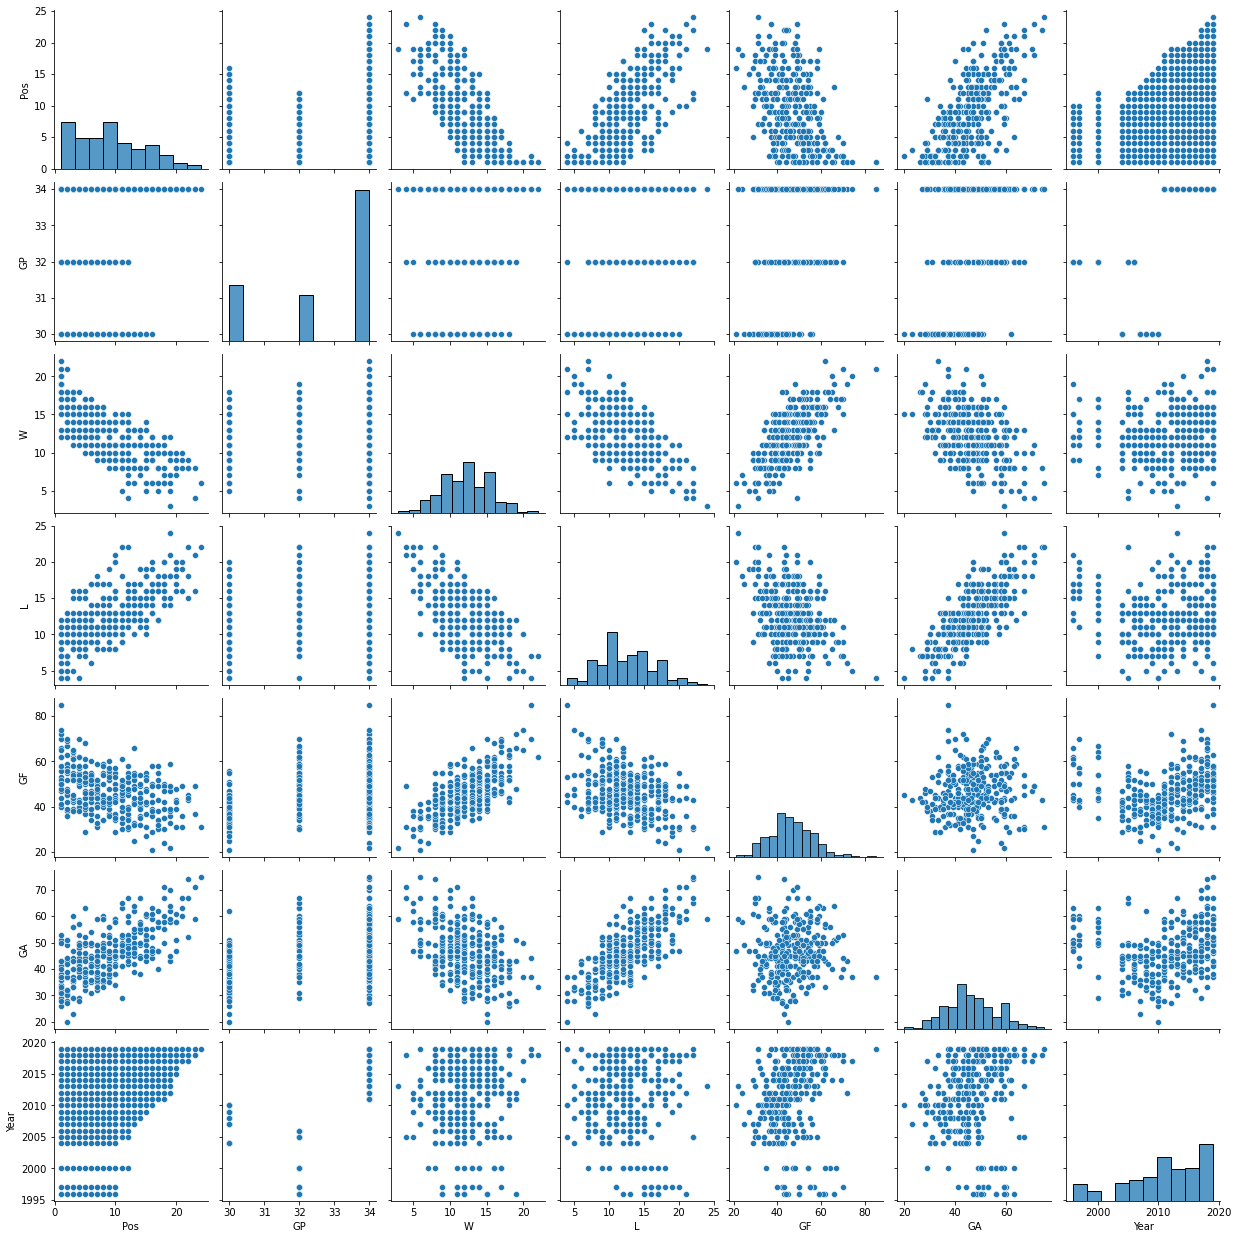

In [50]:
sns.pairplot(gDiff_cleaned)

What's really interesting about this pairplot is the Goals Against and Pos graph. In the heatmap we see the GA has a positive correlation with losses but in the GA and Pos pairplot, there are teams very close to the 1 position and middle of the pack with very high goals against.

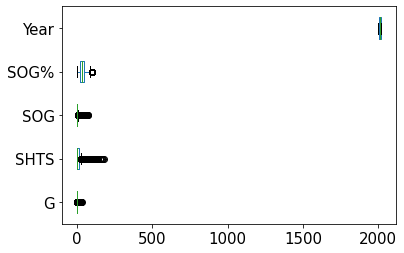

In [51]:
boxplot = pShots_cleaned.boxplot(grid=False, vert=False, fontsize=15)

<AxesSubplot:>

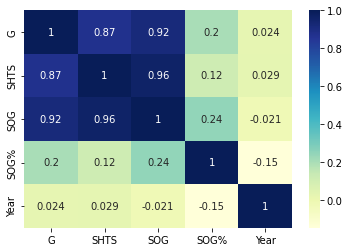

In [52]:
corr2 = pShots_cleaned.corr()
sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, annot=True, cmap="YlGnBu")